# Basics of Machine Learning
In general machine learning can be thought of as function approximation.<br> Let $\mathcal{X}$ be the input space and $\mathcal{Y}$ be the target (or output) space.
We would like to learn a mapping 

$$
\begin{aligned}
f_0:\mathcal{X}\to\mathcal{Y}\\
x\mapsto y.
\end{aligned}
$$


How $\mathcal{X}$,$\mathcal{Y}$ and $f_0(\cdot)$ look like depends on the actual learning problem, but mostly we are interested in
$$f_0(x):= \mathbb{E}[Y|X=x].$$

## Definitions and Concepts
There are different subgroups of learning tasks.<br>
The most basic ones distinguishes between supervised and unsupervised learning.

### Supervised Learning
The most common task in machine learning. In supervised learning the target variable is known during the training/learning process.

Examples:

- *Image Classification* - Given a picture, predict the content (e.g. cars).
- *Sales Prediction* - Given historical data, predict the sales for the next month.
- *Translating Text Sequences* - Given a text, predict the corresponding translation.

In this lecture, we will mostly focus on supervised learning tasks.

### Unsupervised Learning
In contrast to supervised learning, there are no labels known during the learning process. In general, unsupervised learning is about finding interesting transformations or clusters in the data (for visualization, compression, denoising etc.)

Examples: 

- *Clustering*
- *Dimensionality Reduction*

### Semi-supervised Learning
Combinations of supervised and unsupervised algorithms. Often, the first step is to create the target variable from the input and afterwards apply a supervised learning algorithm.



From now on we will assume we are in a supervised learning setting:<br> Given $n$ samples of the input $(y_i,x_i)$, we would like to learn the mapping $f_0$.


### Regression vs. Classification

If the target variable $y$ is quantitative (e.g. $\mathcal{Y}=\mathbb{R}$), the machine learning task is called a **regression** problem and if $y$ is qualitative (e.g. $\mathcal{Y}=\{0,1\}$ for binary classification), the machine learning task is called a **classification** problem.

Remark that the input variables can be quantitative or qualitative. In general, qualitative variable are encoded via dummy variables.

## Loss Functions

We have specified that we would like to learn a mapping $f_0$. But how exactly is this mapping defined?

In general, we assume that $f_0$ is minimizing some average loss $l$, where
$$l:\mathcal{Y}\times\mathcal{Y}\to \mathbb{R}^+$$ 

and
$$f_0:=\arg\min_f\mathbb{E}[l(Y,f(X))].$$

For a regression setting with the most common loss is the **squared loss**:
$$\begin{aligned}
l_2:&\mathbb{R}\times\mathbb{R}\to \mathbb{R}^+\\
&(y_1,y_2)\mapsto (y_1-y_2)^2 \end{aligned}$$

<center>
<img src="./figures/Basics_ML/l2_loss.png" alt="Drawing" style="width: 700px;"/><br>
<b>Figure 1:</b> Squared loss.</center>

It is possible to prove that for the $l_2$ loss it holds
$$\mathbb{E}[Y|X=x]=\arg\min_f\mathbb{E}[l_2(Y,f(X))]=\arg\min_f\mathbb{E}[(Y-f(X))^2].$$

Another important loss function is the **absolute loss**:

$$\begin{aligned}
l_1:&\mathbb{R}\times\mathbb{R}\to \mathbb{R}^+\\
&(y_1,y_2)\mapsto |y_1-y_2| \end{aligned}$$

<center>
<img src="./figures/Basics_ML/l1_loss.png" alt="Drawing" style="width: 700px;"/><br>
<b>Figure 2:</b> Absolute loss.</center>

By minimizing the $l_1$ loss, we are trying to model the conditional median (or $0.5$-quantile):
$$median(Y|X=x)=\arg\min_f\mathbb{E}[l_1(Y,f(X))]=\arg\min_f\mathbb{E}[|Y-f(X)|].$$

In a classification setting $l_2$ and $l_1$ are not applicable.<br> Consider a binary classification problem with $\mathcal{Y}=\{0,1\}$. 

The function we would like to learn is the conditional probability

$$ f(x)=P(Y=1|X=x),$$

such that we can predict the value $1$, if the conditional probability is larger than $0.5$ (Bayes Classifier). 

Motivated by maximum likelihood estimation, given $n$ observations $(Y_i,X_i)$, we would like to minimize

$$\begin{aligned}
-\log\left(\prod_{i=1}^nP(Y_i|X_i)\right)&= \sum_{i=1}^n -\log\left(P(Y_i|X_i)\right)\\
&= \sum_{i=1}^n -Y_1\log\left(P(Y_i=1|X_i)\right)-(1-Y_i)\log\left(1-P(Y_i=1|X_i)\right)\\
&= \sum_{i=1}^n \underbrace{-Y_1\log\left(f(X_i)\right)-(1-Y_i)\log\left(1-f(X_i)\right)}_{=l(Y_i,f(X_i))},
\end{aligned}$$



where the loss function is given by
$$\begin{aligned}
l:&\{0,1\}\times[0,1]\to \mathbb{R}^+ \\
&(y_1,y_2)\mapsto -y_1\log(y_2)-(1-y_1)\log(1-y_2) \end{aligned}$$

This can be generalized to multiple classes.<br> Categorical data is often represented with the **one-hot encoding**. 
Given $K$ different categories the output is encodes in 
$$y = (0,\dots,0,1,0\dots,0)^T,$$
where the position of the $1$ identifies the corresponding category.


Given $y\in \mathcal{Y}_K$, where $\mathcal{Y}_K$ denotes all one-hot encodings over $K$ categories, the **cross entropy loss** is defined as

$$\begin{aligned}
l:&\mathcal{Y}_K\times[0,1]^K\to \mathbb{R}^+ \\
&(y_1,y_2)\mapsto -\sum_{j=1}^K y_{1,j} \log(y_{2,j}) \end{aligned}$$

By minimizing the cross entropy loss we are trying to model the conditional probability $P(Y|X)$.

The final predicted class is then motivated by the Bayes Classifier:
$$\arg\max_{k\in\{1,\dots,K\}} P(Y=k|X=x).$$

## Risk Minimization
All machine learning algorithms are learning a parametrized functions 

$$\begin{aligned}
f:\mathcal{X}\times \Theta \to\mathcal{Y}\\
(x,\theta)\mapsto y,
\end{aligned}$$

where the $f$ is a fixed function and $\theta\in \Theta$ is parameter vector (usually $\Theta=\mathbb{R}^d$, where $d$ can be very large).





The challenge is to learn the parameter vector $\theta_0$, which minimizes the risk (average loss)

$$\theta_0:=\arg\min_{\theta\in\Theta}\mathbb{E}[l(Y,f(X,\theta))].$$


Since we do **not** know the distribution of $(Y,X)$, we instead rely on the empirical measure to estimate $\theta_0$:

$$\hat{\theta}:=\arg\min_{\theta\in\Theta}\mathbb{E}_n[l(Y,f(X,\theta))]=\arg\min_{\theta\in\Theta}\frac{1}{n}\sum\limits_{i=1}^nl(Y_i,f(X_i,\theta)),$$

For example, consider the following univariate linear model

$$Y=a+bX+\varepsilon,$$

where $a,b\in \mathbb{R}$ and $\varepsilon$ is an error term. Then it holds

$$\theta_0=(a,b)^T=\arg\min_{(\alpha,\beta)^T\in\mathbb{R}^2}\mathbb{E}[(Y-\alpha-\beta X)^2].$$

In this setting, given $n$ iid. observations of $(Y_i,X_i)$, the **ordinary least squares estimate** is defined as 
$$\hat{\theta}:=(X^T X)^{-1} X^TY,$$

where $X=(X_1,\dots, X_n)$ and $Y=(Y_1,\dots, Y_n)$. 

Actually, this is an analytic solution to 

$$\hat{\theta}=\arg\min_{(\alpha,\beta)^T\in\mathbb{R}^2}\mathbb{E}_n[(Y-\alpha-\beta X)^2]=\arg\min_{(\alpha,\beta)^T\in\mathbb{R}^2}\frac{1}{n}\sum\limits_{i=1}^n(Y_i-\alpha-\beta X_i)^2.$$

In general, we are not able to solve 

$$\hat{\theta}:=\arg\min_{\theta\in\Theta}\mathbb{E}_n[l(Y,f(X,\theta))]$$

analytically.<br> Instead deep learning (and a lot of other modern machine learning methods such as boosting) relies on gradient descent to try to minimize the empirical loss.

Remark that using gradient descent methods might result in finding local minima.

## Gradient Descent

Let $f:\mathbb{R}^d \to \mathbb{R}$.<br> The gradient of $f$ is defined as

$$\nabla_x f(x):=\left(\frac{\partial f(x)}{\partial x_1},\dots,\frac{\partial f(x)}{\partial x_d}\right)^T.$$

Assume we start in some random point $x^{(0)}$ and would like to find the point 

$$\tilde{x}:= \arg\min_{x\in\mathcal{N}(x^{(0)})} f(x),$$

where $\mathcal{N}(x)$ is a neighborhood of $x_0$. 

Since the gradient can be interpreted as the direction of the fastest increase of $f(x)$, the gradient descent methods updates the value of $x_0$
in the direction of the negative gradient

$$x^{(1)} = x^{(0)} -\nu \nabla_x f(x^{(0)}),$$

where $\nu \in \mathbb{R}^+$ is called the step size (typically chosen very small).

Iteratively repeating this procedure

$$x^{(n)} = x^{(n-1)} -\nu \nabla_x f(x^{(n-1)}),$$

will hopefully converge to a local minimum (can be guaranteed under certain assumptions as convexity and lipschitz-differentiability).

As gradient descent methods are crucial to deep learning algorithms, the tensor class supports automatic differentiation. In the following, we will introduce a simple example.<br> Let 

$$\begin{aligned}
f:\mathbb{R}^2 &\to\mathbb{R}\\
(x_1,x_2)^T&\mapsto x_1^2+x_2^2
\end{aligned}$$

and assume we start in the point $x^{(0)}=(-0.9,0.8)^T$.

<center>
<img src="./figures/Basics_ML/gradient_1.png" alt="Drawing" style="width: 1000px;"/><br>
<b>Figure 3:</b> Gradient descent.</center>

If we now calculate the gradient, we obtain

$$\nabla_x f(x^{(0)}):=\left(\frac{\partial f(x^{(0)})}{\partial x_1},\frac{\partial f(x^{(0)})}{\partial x_2}\right)^T=\left(2x_1,2x_2\right)^T=\left(-1.8,1.6\right)^T.$$

Assuming a stepsize of $\nu_1 = 0.1$, we obtain

$$x^{(1)} = x^{(0)} -\nu_1 \nabla_x f(x^{(0)})=(-0.9,0.8)^T-0.1 \left(-1.8,1.6\right)^T=(-0.72,0.64)^T$$

<center>
<img src="./figures/Basics_ML/gradient_2.png" alt="Drawing" style="width: 1000px;"/><br>
<b>Figure 4:</b> Gradient descent.</center>

The next step would be (again with $\nu_2 = 0.1$)

$$x^{(2)} = x^{(1)} -\nu_2 \nabla_x f(x^{(1)})=(-0.72,0.64)^T-0.1 \left(-1.44,1.28\right)^T=(-0.576,0.512)^T$$

and by iterating this procedure we would converge to $\tilde{x}=(0,0)^T$.

<center>
<img src="./figures/Basics_ML/gradient_3.png" alt="Drawing" style="width: 1000px;"/><br>
<b>Figure 5:</b> Gradient descent.</center>

Instead of calculating the gradient by hand, we can instead use the automatic differentiation of pytorch. Here, automatic differentiation mean that pytorch builds an computational graph, to be able to calculate the gradient after a combination of "simple" operations.

In [1]:
import torch
x_0 = torch.tensor([-.9,.8],requires_grad = True)
print(x_0)

tensor([-0.9000,  0.8000], requires_grad=True)


Here `requires_grad=True` specifies a place to store the gradient, since in deep learning models these are updated thousands of times (which will produce memory issues if we allocate new memory for every update).


In the next step, we will calculate $f(x)$:

In [2]:
fx = sum(x_0**2)
print(fx)

tensor(1.4500, grad_fn=<AddBackward0>)


We can automatically calculate the gradient of $f(x_0)$ by calling the function for backpropagation:

In [3]:
fx.backward()
print(x_0.grad)

tensor([-1.8000,  1.6000])


Here, the backpropagation traces the computational graph backwards to $x_0$ (in this case only one step) and calculates the partial derivatives. To detach the calculations from the computational graph we can use

In [4]:
print(x_0.detach())

tensor([-0.9000,  0.8000])


## Training a Machine Learning Model

In the previous sections, we have defined learning/training a machine learning model as learning parameters/weights, which minimize the empirical risk

$$\hat{\theta}:=\arg\min_{\theta\in\Theta}\mathbb{E}_n[l(Y,f(X,\theta))].$$

In deep learning this is generally done with gradient descent methods due to the complicated form of $f(x,\theta)$.

<center>
<img src="./figures/Basics_ML/optimization.png" alt="Drawing" style="width: 800px;"/><br>
<b>Figure 6:</b> Training procedure.</center>

### Basic Linear Regression

In a basic multivariate linear regression model, we assume that the output $Y$ is a linear function of the inputs $X=(1,X_1,\dots,X_p)^T$
$$Y=w_0+w_1X_1+\dots+w_pX_p + \epsilon = w^TX+\epsilon.$$

Here, $w=(w_0,w_1,\dots,w_p)^T$ is a vector of coefficients (or weights) and $\varepsilon$ is an unobserved error term. 

Under the assumption $\mathbb{E}[\varepsilon|X]=0$ this corresponds to 
$$\mathbb{E}[Y|X=x]= w^Tx.$$

Therefore, we can interpret this as minimizing the average squared loss, with the weights $w$ being the parameter vector $\theta_0$ we would like to learn.

$$w=\arg\min_{b\in\mathbb{R}^{p+1}}\mathbb{E}[(Y-b^TX)^2] $$

For linear models there exists an analytical solution (under some mild assumptions).<br> Instead of directly using the analytical solution to estimate the weights $w$, we apply the gradient descent method.

In the following, we implement basic linear regression including a small bivariate simulation example. We generate $n = 200$ observations with the following process
$$Y=2-3X_1-1.5X_2 +\varepsilon,$$

where $X_1$, $X_2$ and $\varepsilon$ follow independent standard normal distributions.

In [5]:
import random; import torch
def dgp_linear_regression (weights,intercept, n):
    X = torch.normal(0,1,(n,len(weights)))
    Y = intercept + torch.mv(X,weights) + torch.normal(0,1,(1,n))
    return X,Y.reshape((-1,1))

true_weights = torch.tensor([-3.0, -1.5])
true_intercept = 2

#generate data
n_obs = 200
torch.manual_seed(42) #set a seed for replicability
features, labels = dgp_linear_regression(true_weights,true_intercept, n_obs)

Remark that we defined the intercept (or bias) separately (which is more convenient and saves computational resources). Let us take a look at the generated data.

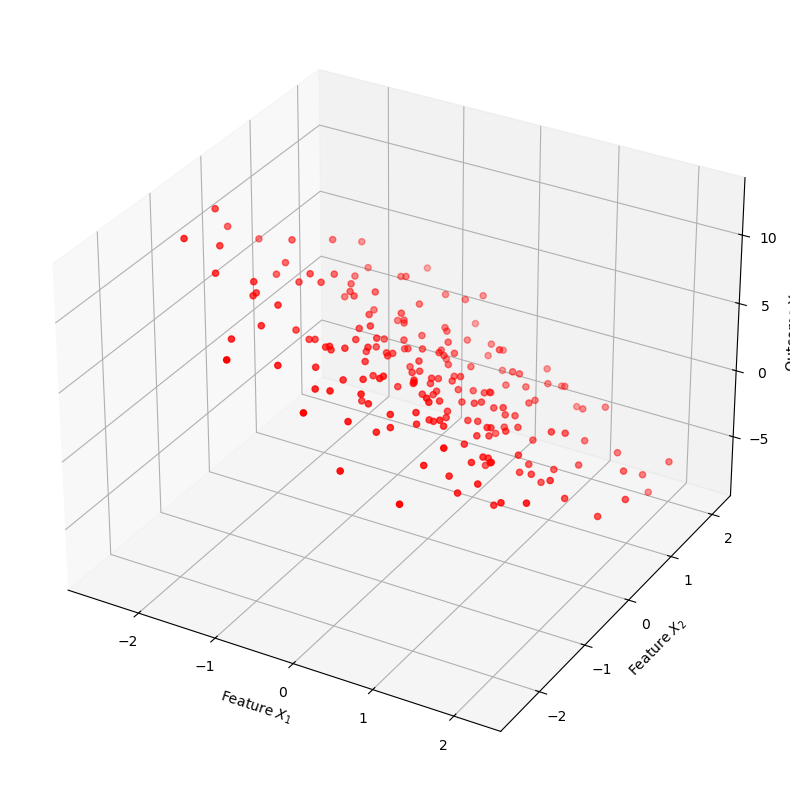

In [6]:
%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D; from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(20,10), dpi= 100); ax = fig.add_subplot(111,projection='3d')
x1 = features[:,0]
x2 = features[:,1]
y = labels
ax.scatter(x1,x2,y, marker='o', color='red') 
ax.set_xlabel("Feature $X_1$"); ax.set_ylabel("Feature $X_2$"); ax.set_zlabel("Outcome Y")
plt.show()

We will initialize our weights randomly with distribution $\mathcal{N}(0,0.1)$ and set the bias to $0$.

In [7]:
weights = torch.normal(0,.01,size=(2,1),requires_grad= True)
intercept = torch.zeros(1,requires_grad=True)
print(weights)
print(intercept)

tensor([[-0.0143],
        [-0.0038]], requires_grad=True)
tensor([0.], requires_grad=True)


At first let us calculate the predicted values (with random weights).

In [8]:
Y_hat = intercept + torch.mm(features,weights)
print(Y_hat[0:5])

tensor([[-0.0332],
        [-0.0049],
        [-0.0050],
        [ 0.0067],
        [ 0.0045]], grad_fn=<SliceBackward0>)


Next, we want to calculate the empirical loss.

In [9]:
training_loss = torch.mean((Y_hat-labels.reshape(Y_hat.shape))**2)
print(training_loss)

tensor(16.7457, grad_fn=<MeanBackward0>)


Here, `training_loss.backward()` will compute the gradient of loss with respect to all Tensors with `requires_grad=True`. The gradient takes the following form:

In [10]:
training_loss.backward()
print(weights.grad)
print(intercept.grad)

tensor([[6.7407],
        [2.4970]])
tensor([-3.9418])


Next, we update the parameters

In [11]:
learning_rate = 0.001
with torch.no_grad():
    weights -= learning_rate*weights.grad
    intercept -= learning_rate*intercept.grad        
    
    # Manually zero the gradients after updating weights
    weights.grad.zero_()
    intercept.grad.zero_()
    
print(weights)
print(intercept)

tensor([[-0.0210],
        [-0.0063]], requires_grad=True)
tensor([0.0039], requires_grad=True)


Remark that we used `torch.no_grad()`, because the parameters have `requires_grad=True`, but we don't want to track this step in autograd.<br> Additionally, we have to reset the gradients to zero, if we want to repeat this step multiple times.

An alternative way is to operate on `weights.data` and `weights.grad.data`. Here, *tensor.data* gives a tensor that shares the storage with tensor, but doesn't track history.

In [12]:
weights.data -= learning_rate*weights.grad.data
intercept.data -= learning_rate*intercept.grad.data  
# Manually zero the gradients after updating weights
weights.grad.data.zero_()
intercept.grad.data.zero_()

print(weights)
print(intercept)

tensor([[-0.0210],
        [-0.0063]], requires_grad=True)
tensor([0.0039], requires_grad=True)


We will now combine all of this in a loop (with a slightly larger learning rate) to iteratively minimize the empirical risk

In [13]:
learning_rate = 0.03
for i in range(500):
    Y_hat = intercept + torch.matmul(features,weights)
    training_loss = torch.mean((Y_hat-labels.reshape(Y_hat.shape))**2)
    training_loss.backward()
    with torch.no_grad():
        weights -= learning_rate*weights.grad
        intercept -= learning_rate*intercept.grad        
    
        # Manually zero the gradients after updating weights
        weights.grad.zero_()
        intercept.grad.zero_()

print(weights)
print(intercept)

tensor([[-3.0315],
        [-1.4270]], requires_grad=True)
tensor([1.9621], requires_grad=True)


Our parameters are quite close to the true values. Lets take a look at our final model

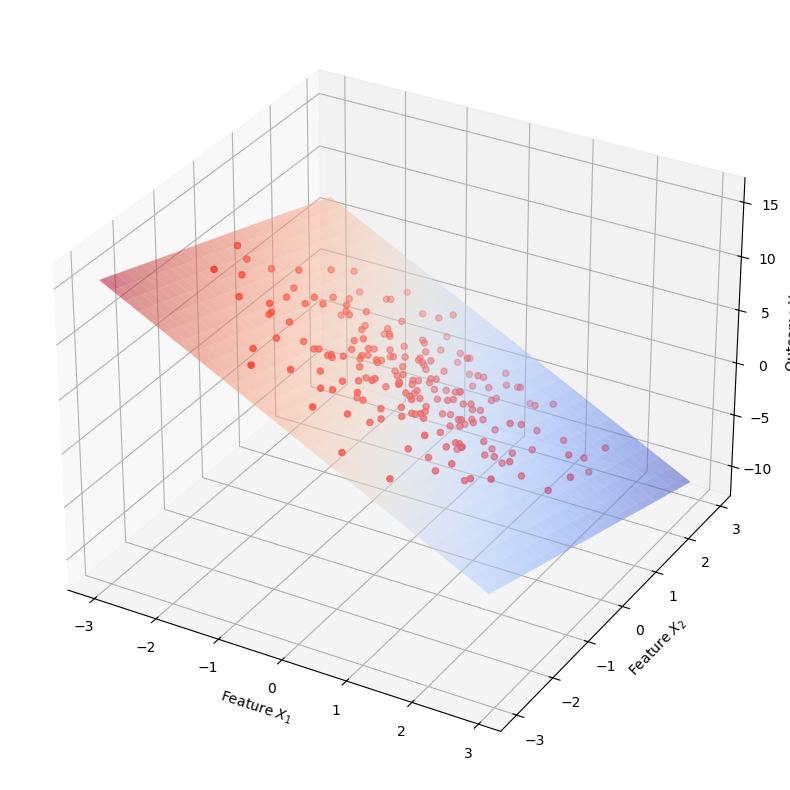

In [14]:
from matplotlib import cm
xs = np.tile(np.arange(61), (61,1))
ys = np.tile(np.arange(61), (61,1)).T
base_grid = np.arange(-3,3,0.1)
xs = np.tile(base_grid, (len(base_grid),1))
ys = np.tile(base_grid, (len(base_grid),1)).T

zs = xs*weights[0].detach().numpy()+ys*weights[1].detach().numpy()+intercept.detach().numpy()
ax.plot_surface(xs,ys,zs, alpha=0.5, cmap =cm.coolwarm)
fig

The linear model can be represented by the following graph structure.

<center>
<img src="./figures/Basics_ML/biv_regr_graph.png" alt="Drawing" style="width: 800px;"/><br>
<b>Figure 7:</b> Linear Model.</center>

### Stochastic Gradient Descent

The training loop from the previous chapter, displays the basic idea of training a machine learning model with gradient descent. 

In practice, if the number of observations $n$ is really large and the function $f(x,\theta)$ is more complex we will run into computational problems really fast. In general, the calculation of the gradient on all samples is too costly.

An easy solution is to use a stochastic version of the gradient descent method called **stochastic gradient descent**. 

Instead of using all samples in each iteration of the training loop, we will only use a small random subset of the observations, where the subset is called **batch**.<br>
Stochastic gradient descent generally refers to only using a single observation for each update step (batch size of one).  Very small subsets are usually called **mini-batch**, whereas using the whole sample is called **full batch**.

The basic idea is that on a random sample the gradient is still a unbiased (but noisy) estimate of the true gradient

$$\nabla_\theta\mathbb{E}[l(Y,f(X,\theta))].$$

In practice deep learning is done in a series of **epochs**, where one **epoch** consists of one backpropagation pass over the whole dataset. 

In the previous example, we did use **full batch** and each iteration corresponded to one epoch. 

General Training Procedure:

1. Set the number of epochs and the batch size.
2. Randomly devide the training set into batches of the specified batch size.
3. Iterate the training loop over all batches (each iteration a batch is randomly drawn without replacement).
4. Repeat steps 2 and 3 for each epoch.

We will repeat the linear regression example with stochastic gradient descent.<br> At first, we will need a data loader, which automatically provides the batches.

In [15]:
def data_iter(batch_size, features, labels):
    n = len(labels)
    indices = list(range(n))
    random.shuffle(indices)
    for i in range(0,n,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,n)])
        yield features[batch_indices], labels[batch_indices]

for X,Y in data_iter(5, features, labels): #test the batches
    print(X, "\n", Y)
    break

tensor([[ 1.3059,  0.2466],
        [-0.2234,  1.7174],
        [-0.8057, -0.2076],
        [ 0.2691, -0.0366],
        [ 1.3347,  0.4835]]) 
 tensor([[-3.7450],
        [-1.2305],
        [ 4.6554],
        [ 0.6401],
        [-3.4757]])


Now we can repeat the model training.

In [18]:
weights = torch.normal(0,.01,size=(2,1),requires_grad= True)
intercept = torch.zeros(1,requires_grad=True)
learning_rate = 0.03
batch_size = 10
n_epochs = 5
for epoch in range(n_epochs):
    for X,Y in data_iter(batch_size, features, labels):
        Y_hat = intercept + torch.matmul(X,weights)
        training_loss = torch.mean((Y_hat-Y.reshape(Y_hat.shape))**2)
        training_loss.backward()
        with torch.no_grad():
            weights -= learning_rate*weights.grad
            intercept -= learning_rate*intercept.grad        
            weights.grad.zero_()
            intercept.grad.zero_()

print(weights)
print(intercept)

tensor([[-3.0133],
        [-1.3649]], requires_grad=True)
tensor([1.9872], requires_grad=True)


There exist a lot of different variants of the stochastic gradient descent algorithms, which are explained in more detail in later sections.

###  Building Linear Regression using High-Level APIs
Next, we will show you how to implement the linear regression model concisely by using high-level APIs of deep learning frameworks.<br> The first step is to replace our own data loader by the existing API in a framework to read data.<br> We pass in features and labels as arguments and specify `batch_size` when instantiating a data iterator object. Besides, the boolean value `is_train` indicates whether or not we want the data iterator object to shuffle the data on each epoch (pass through the dataset).

In [19]:
from torch.utils import data
def load_array(data_arrays, batch_size, is_train=True): 
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

Now we can use `data_iter` in much the same way as we called the `data_iter` function in the previous section. To verify that it is working, we can read and print the first batch of examples. Here, we use iter to construct a Python iterator and use next to obtain the first item from the iterator.

In [20]:
print(next(iter(data_iter)))

[tensor([[-0.6855,  0.5636],
        [ 1.9003,  1.6951],
        [-0.9852, -2.4885],
        [ 0.8539,  0.5130],
        [-1.2742,  2.1228],
        [-0.3532,  1.4639],
        [ 0.1539, -1.0603],
        [-0.7521,  1.6487],
        [ 0.5667, -0.7098],
        [-0.8076,  0.8244]]), tensor([[ 4.5550],
        [-8.0334],
        [ 9.5864],
        [-1.2380],
        [ 2.5921],
        [ 0.4773],
        [ 3.3216],
        [ 2.7457],
        [ 2.5309],
        [ 3.0995]])]


In [21]:
from torch import nn
lin_reg = nn.Sequential(nn.Linear(2, 1))

Here, `nn` is an abbreviation for neural networks and `nn.Linear(2,1)` applies a linear transformation as in the previous represented graph.

<center>
<img src="./figures/Basics_ML/biv_regr_graph.png" alt="Drawing" style="width: 800px;"/><br>
<b>Figure 8:</b> Linear Model.</center>

We still have to initalize the weights (with $w_0= bias$).

In [22]:
lin_reg[0].weight.data.normal_(0, 0.01)
lin_reg[0].bias.data.fill_(0)
print(lin_reg[0].weight.data)
print(lin_reg[0].bias.data)

tensor([[0.0066, 0.0039]])
tensor([0.])


We can specify our loss, by using already existing classes:

In [23]:
loss = nn.MSELoss()

For optimization we will use `torch.optim`, which is a package implementing various popular optimization algorithms.

In [24]:
trainer = torch.optim.SGD(lin_reg.parameters(), lr=0.01)

Here, `torch.optim.SGD` constructs a stochastic gradient descent optimizer for all weights of `lin_reg` with the `lr` being the learning rate.

In [25]:
num_epochs = 5
for epoch in range(num_epochs):
    for X, y in data_iter:
        training_loss = loss(lin_reg(X) ,y)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
  
    training_loss = loss(lin_reg(features), labels) #calculate the loss on the whole training sample
    print(f'epoch {epoch + 1}, loss {training_loss:f}')

epoch 1, loss 7.708843
epoch 2, loss 3.813389
epoch 3, loss 2.167568
epoch 4, loss 1.458293
epoch 5, loss 1.160454


In [26]:
w = lin_reg[0].weight.data
print('Estimated weights w:',  w)
b = lin_reg[0].bias.data
print('Estimated intercept/bias:', b)

Estimated weights w: tensor([[-2.7322, -1.1748]])
Estimated intercept/bias: tensor([1.6895])


## Assessing Model Performance
We have learned our machine learning model by minimizing the empirical risk

$$\mathbb{E}_n[l(Y,f(X,\theta))].$$

But our goal is to obtain a model which performs well (having a low loss on average) on unseen data. 

The following simple example highlights, why this might fail.

In most cases the target function $f_0$ is much more complicated than just a plain linear function of the raw inputs. 

Let uns consider the following univariate example:

$$Y=0.5-1.4X + 4.4X^2 - 2.1X^3 +\varepsilon,$$

where $X\sim\mathcal{U}[-1,1)$ and $\varepsilon$ is drawn from a standard normal distribution.

In [27]:
n = 10 #number of observations
torch.manual_seed(42) #set a seed for replicability

features = 2*torch.rand(n,1)-1
labels = 0.5-1.4*features + 4.4*features**2 - 2.1*features**3 + torch.normal(0,1,(1,n)).reshape(-1,1)

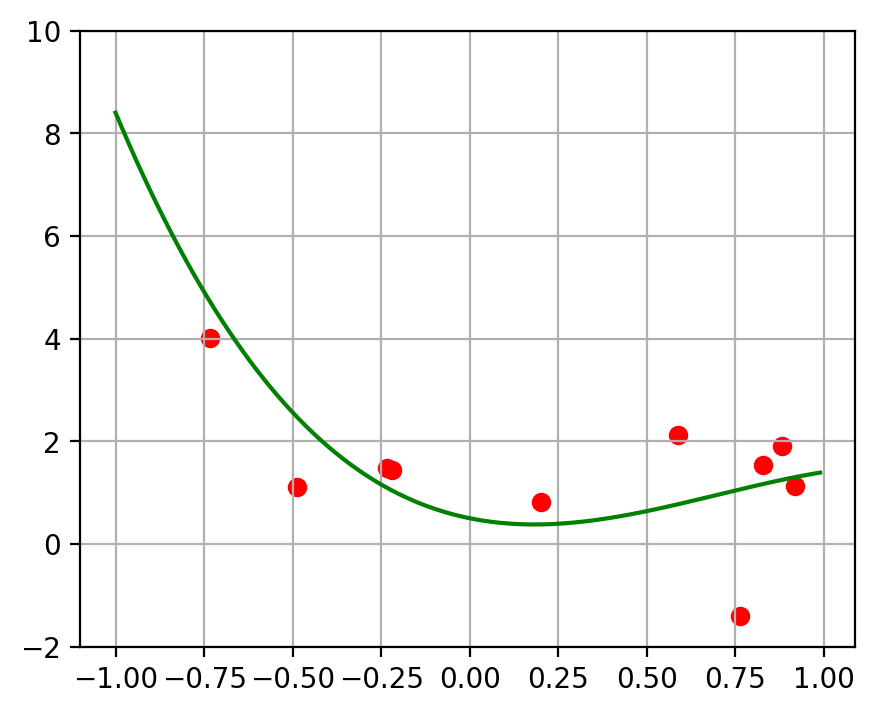

In [28]:
fig = plt.figure(figsize=(5,4), dpi= 200)
plt.scatter(features, labels, c='red')
x = torch.arange(-1,1,0.01)
fx = 0.5-1.4*x + 4.4*x**2 -2.1*x**3
plt.plot(x,fx,c='green')
plt.grid(True)
plt.ylim((-2, 10)) 
plt.show()

A linear regression is too simple capture the data generating process. 

In [29]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
lin_reg = nn.Sequential(nn.Linear(1, 1))
lin_reg[0].weight.data.normal_(0, 0.01)
lin_reg[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(lin_reg.parameters(), lr=0.03)
num_epochs = 50
for epoch in range(num_epochs):
    for X, y in data_iter:
        training_loss = loss(lin_reg(X) ,y)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
training_loss = loss(lin_reg(features), labels) #calculate the loss on the whole training sample
print(f'epoch {epoch + 1}, loss {training_loss:f}')

epoch 50, loss 1.384482


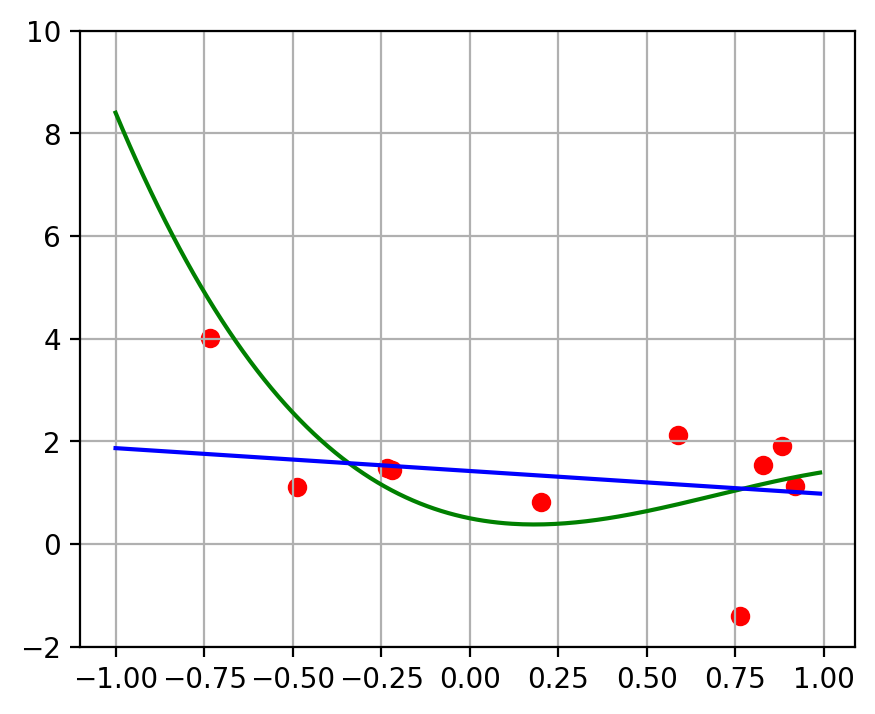

In [30]:
fig = plt.figure(figsize=(5,4), dpi= 200)
plt.scatter(features, labels, c='red')
fx_hat= lin_reg[0].bias.data.detach()+lin_reg[0].weight.data.detach()*x 
plt.plot(x,fx,c='green')
plt.plot(x,fx_hat.reshape(-1,1),c='blue')
plt.grid(True)
plt.ylim((-2, 10)) 
plt.show()

This is called **underfitting** since the machine learning model is too simple and therefore not able to approximate $f_0$.

We can increase the capability of linear regression by using polynomial regression, which increases the flexibility of our machine learning model.<br> But if the flexability is too large, the training process might not converge to a helpful solution, but instead starts to "learn" the noise in the data.

In [32]:
max_degr = 10
polynomial_features = features
for degr in range(1,max_degr):
    polynomial_features = torch.cat((polynomial_features,features**(degr+1)), dim = 1)

In [33]:
batch_size = 10
data_iter = load_array((polynomial_features, labels), batch_size)
lin_reg = nn.Sequential(nn.Linear(max_degr, 1))
lin_reg[0].weight.data.normal_(0, 0.01)
lin_reg[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(lin_reg.parameters(), lr=.4)
num_epochs = 50000
for epoch in range(num_epochs):
    for X, y in data_iter:
        training_loss = loss(lin_reg(X) ,y)
        trainer.zero_grad() #reset the gradient to zero
        training_loss.backward()
        trainer.step()
training_loss = loss(lin_reg(polynomial_features), labels) #calculate the loss on the whole training sample
print(f'epoch {epoch + 1}, loss {training_loss:f}')

epoch 50000, loss 0.675647


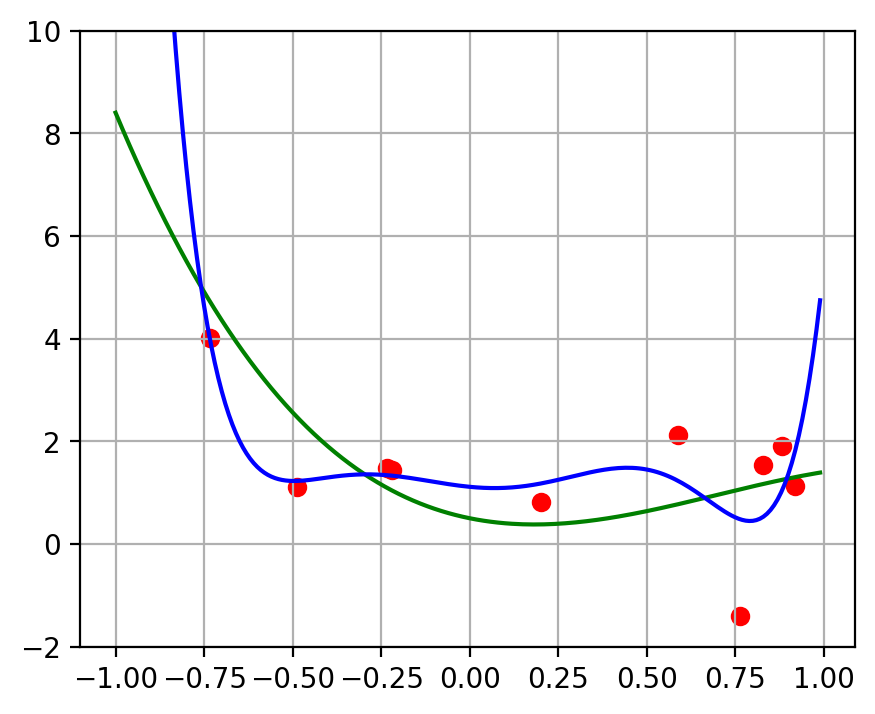

In [34]:
fig = plt.figure(figsize=(5,4), dpi= 200)
plt.scatter(features, labels, c='red')
fx_hat_2 = lin_reg[0].bias.data.detach()+lin_reg[0].weight.data[0,0].detach()*x 
for degr in range(1,max_degr):
    fx_hat_2 +=lin_reg[0].weight.data[0,degr].detach()*x**(degr+1) 
plt.plot(x,fx,c='green')
plt.plot(x,fx_hat_2.reshape(-1,1),c='blue')
plt.grid(True)
plt.ylim((-2, 10)) 
plt.show()

This process of "learning" noise is called **overfitting**.<br>
For example in the context of image recognition this might correspond to learning irrelevant artifacts like backgrounds or shadows.

For the mean-squared error under- and overfitting can be motivated with the **bias-variance-tradeoff**:

$$\begin{aligned}
\mathbb{E}[(Y-f(X,\theta))^2]
&=\underbrace{\mathbb{E}\left[\big(\mathbb{E}[f(X,\theta)]-f(X,\theta)\big)^2\right]}_{\text{Variance}} + \underbrace{\big(\mathbb{E}[Y|X]-\mathbb{E}[f(X,\theta)]\big)^2}_{\text{Bias}^2}\\
&\quad +\underbrace{\text{Var}\big(Y-\mathbb{E}[Y|X]\big)}_{\text{irreducible error}}
\end{aligned}$$



<center>
<img src="figures/Basics_ML/bias_variance_tradeoff.png" alt="Drawing" style="width: 400px;"/><br></center>
<center><b>Figure 9:</b> Bias-Variance tradeoff.</center>

To avoid under- and overfitting it is important to monitor the model performance during the training procedure. In general, this is done by **sample splitting**.

Sample splitting refers to creating several subsets of your sample, which are used for different purposes.

- **Training Set**: Used to train the weights of the machine learning algorithm.
- **Testing Set**: Used to evaluate the risk of the final model.
- **Validation Set**: Sometimes the training set is split further to monitor the training process and choose some tuning parameters.

The terms testing set and validation set are not uniquely defined and sometimes used interchangeably.

<center>
<img src="figures/Basics_ML/workflow.png" alt="Drawing" style="width: 400px;"/><br>
<b>Figure 10:</b> Sample splitting.</center>

The test set simulates, how the model generalizes to unseen/new data.

<center>
<img src="figures/Basics_ML/under-overfitting.png" style="width: 400px;"/><br>
<b>Figure 11:</b> Under- and Overfitting.</center>

We now revisit the example above. Suppose we have had an equally sized test sample which we did not use for training.

In [35]:
n_test = 20 #number of observations
test_features = 2*torch.rand(n,1)-1
test_polynomial_features = test_features
for degr in range(1,max_degr):
    test_polynomial_features = torch.cat((test_polynomial_features,test_features**(degr+1)), dim = 1)

test_labels = 0.5-1.4*test_features + 4.4*test_features**2 - 2.1*test_features**3 + torch.normal(0,1,(1,n)).reshape(-1,1)

print(f'epoch {epoch + 1}, loss {training_loss:f}') #recap the training loss
test_loss = loss(lin_reg(test_polynomial_features), test_labels) #calculate the loss on the whole training sample
print(f'epoch {epoch + 1}, loss {test_loss:f}')

epoch 50000, loss 0.675647
epoch 50000, loss 2.656080


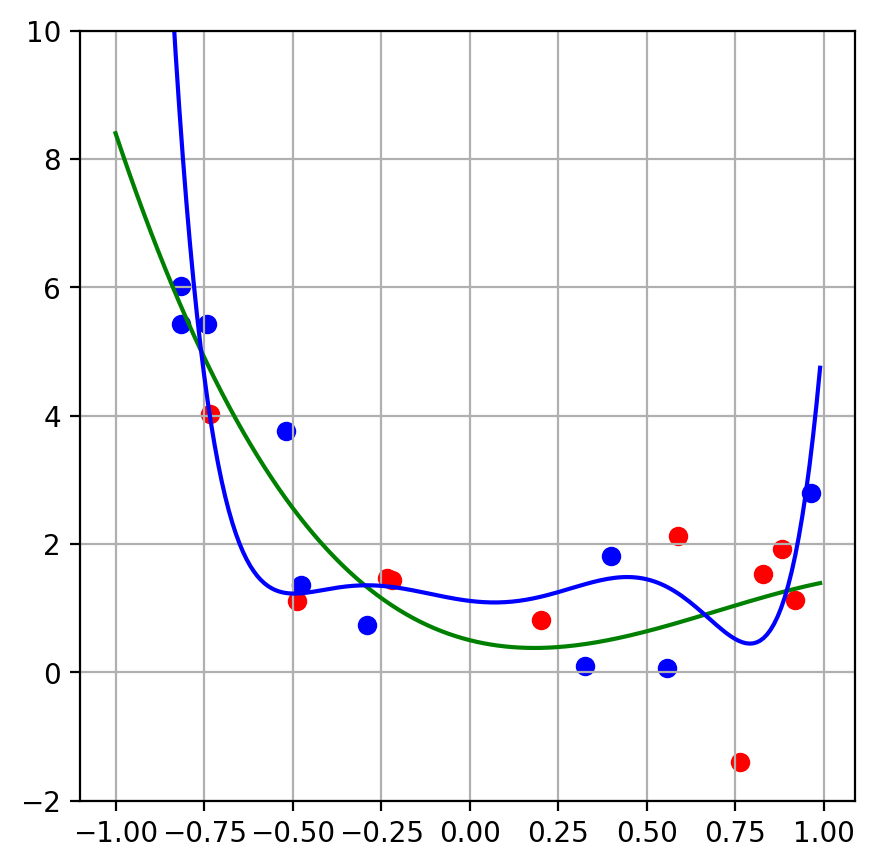

In [36]:
fig = plt.figure(figsize=(5,5), dpi= 200)
plt.scatter(features, labels, c='red')
plt.scatter(test_features, test_labels, c='blue')
fx_hat_2 = lin_reg[0].bias.data.detach()+lin_reg[0].weight.data[0,0].detach()*x 
for degr in range(1,max_degr):
    fx_hat_2 +=lin_reg[0].weight.data[0,degr].detach()*x**(degr+1) 
plt.plot(x,fx,c='green')
plt.plot(x,fx_hat_2.reshape(-1,1),c='blue')
plt.grid(True)
plt.ylim((-2, 10)) 
plt.show()

To split the data set the function `train_test_split` from `sklearn.model_selection` is very useful. The workflow has the following form

<center>
<img src="./figures/Basics_ML/train_test_workflow.png" alt="Drawing" style="width: 1000px;"/><br>
<b>Figure 12:</b> Machine learning workflow.</center>

The evaluation of the model performance can be theoretically be done at every iteration of the training loop. In practice, to save computational resources the test loss is often only calculated every i-th epoch or iteration step.

If one has only a small number of observations, it is quite costly to not use the testing set for training. A good alternative is to rely on **k-fold cross-validation**.

Here, the data set is divided into $k$ disjoint subsets of equal size. Next, the machine learning model is learned $k$ times with each subset being the the test set once and all other $k-1$ sets representing the training set. Finally, the model performance is evaluated by averaging all $k$ testing errors.


</i><center>
<img src="figures/Basics_ML/5foldcv.jpg" alt="Drawing" style="width: 400px;"/><br><center>
<b>Figure 13:</b> Cross-validation.</center>